In [25]:
import torch
from torch.nn import CrossEntropyLoss, Sigmoid, ReLU, Softsign
from TrainingEnvironments.FeedForwardTrainingEnvironment import FeedForwardTrainingEnvironment
from Datasets.GaussianSample import GaussianData

from Models.MLP import MLP
import torch.optim as optim 

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Constant Model Parameters
midpoint_collection = {

    2: torch.tensor([
            [.2, .8],
            [.8, .2]
        ]),

    3: torch.tensor([
            [.2, .8],
            [.5, .5],
            [.8, .2]
        ]),

    4: torch.tensor([
            [.2, .2],
            [.2, .8],
            [.8, .2],
            [.8,.8]
        ]),

    5: torch.tensor([
            [.2, .2],
            [.2, .8],
            [.5, .5],
            [.8, .2],
            [.8,.8]
        ]),

    6: torch.tensor([
            [.2, .2],
            [.2, .5],
            [.2, .8],
            [.8, .2],
            [.8, .5],
            [.8,.8]
    ]),

    9: torch.tensor([
            [.2, .2],
            [.2, .5],
            [.2, .8],
            [.5, .2],
            [.5, .5],
            [.5, .8],
            [.8, .2],
            [.8, .5],
            [.8,.8]
    ]),


}


#Constant Environment Parameters
epochs = 5000

batchsize = 100

criterion = CrossEntropyLoss()

# Visualise Data

In [27]:
# for midpoint_list in midpoint_collection.values():
#     data = GaussianData(midpoint_list, (1/16))
#     data.showData()


# Experiment 1

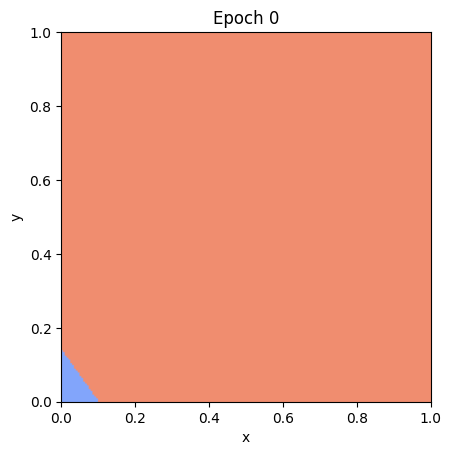

In [28]:
# Independent Variables
activation_function = Softsign
midpoints = midpoint_collection[9]


data = GaussianData(midpoints, (1/16))

model = MLP(midpoints.shape[1], [2], midpoints.shape[0], activation_function)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Creation and Running of Training Environment
Experiment1 = FeedForwardTrainingEnvironment(data, model, criterion, optimizer, epochs, batchsize)
loss_data, accuracy_data = Experiment1.trainModel()

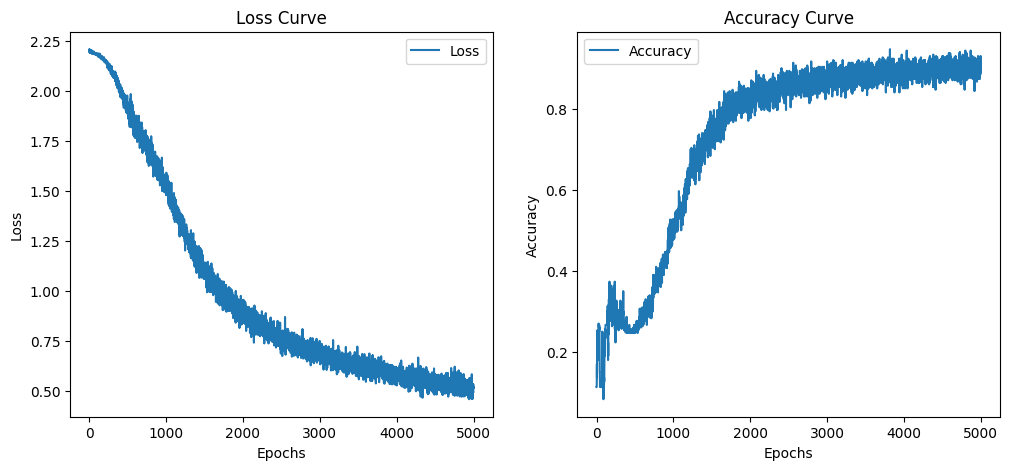

In [29]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_data, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_data, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [30]:
# # Variable Model Parameters
# trials = 1
# hidden_shapes_list = [

#     [2,2],
    
#     ]
# activation_function = Softsign

# data_columns = ["Trial", "Depth", "Width", "Epoch", "Accuracy", "Loss"]


# for trial in range(trials):
#     data = GaussianData(midpoints)

#     for hidden_shapes in hidden_shapes_list:
        
#         current_data_columns = data_columns + [f'Layer {i+1} Mean Activations' for i in range(len(hidden_shapes))] + [f'Layer {i+1} STD Activations' for i in range(len(hidden_shapes))] + [f'Layer {i+1} Mean Gradient' for i in range(len(hidden_shapes))] + [f'Layer {i+1} STD Gradient' for i in range(len(hidden_shapes))]
#         print(current_data_columns)

#         #Creation of Model and Optimizer
#         model = MLP(midpoints.shape[1], hidden_shapes, midpoints.shape[0], activation_function)
#         optimizer = optim.SGD(model.parameters(), lr=0.1)

#         # Creation and Running of Training Environment
#         print(hidden_shapes)
#         Experiment1 = FeedForwardTrainingEnvironment(data, model, criterion, optimizer, epochs, batches, batchsize)
#         loss_data, accuracy_data, mean_activation_data, std_activation_data, mean_gradient_data, std_gradient_data = Experiment1.trainModel()

#         pd.DataFrame(torch.cat((
#                         torch.stack((
#                             trial*torch.ones(epochs),
#                             len(hidden_shapes)*torch.ones(epochs),
#                             hidden_shapes[0]*torch.ones(epochs),
#                             torch.tensor(range(epochs)),
#                             torch.tensor(accuracy_data),
#                             torch.tensor(loss_data),
#                         ), dim=1),                         
#                         torch.tensor(mean_activation_data).T,
#                         torch.tensor(std_activation_data).T,
#                         torch.tensor(mean_gradient_data).T,
#                         torch.tensor(std_gradient_data).T
#                     ), dim=1),
#                     columns=current_data_columns)#.to_csv(f"./CollectedData/Softsign/uniform_25_75/trial{str(trial+1)}_depth{len(hidden_shapes)}_width{hidden_shapes[0]}.csv")